# Objective

Compare Pabuc Burnu full body amphora point clouds with PB_L0082 as the reference jar.

Include max diameter and height on the plots.

Sanity check: Check whether all avg NNDs compared with 0082 are less than the avg NND between 0084 (largest jar) and 0102 (smallest jar), and all delta max diameters from 0082 are less than the delta max diameter between 0084 and 0102.

# Dataset

Reference:
- PB_L0082

Compared:
- PB_2001-5-3
- PB_L0053
- PB_L0054
- PB_L0084
- PB_L0102
- PB_L0177
- PB_L0258
- PB_L0343
- PB_L0442

Omitted due to missing chunks:
- PB_L0083 - missing chunk of neck
- PB_L0421 - missing chunk of neck
- PB_L0895 - missing chunk of upper body

Also compared with each other as a sanity check:
- 0084 (largest jar)
- 0102 (smallest jar)

# Results

- Morphological difference (avg. NND) from 0082 tends to correspond with delta max diameter from 0082, although not perfectly.
- Delta height does not seem to correspond with avg. NND or delta max diameter from 0082.
- The sanity check passes: All avg NNDs compared with 0082 are less than the avg NND between 0084 (largest jar) and 0102 (smallest jar), and all delta max diameters from 0082 are less than the delta max diameter between 0084 and 0102.

In [1]:
import util
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
%load_ext autoreload
%autoreload 2

In [107]:
df = pd.read_csv('max_diam.csv')

In [108]:
df

,name,max_diam
0,PB_2001-5-3_obj.obj,327.2
1,PB_L0053_obj.obj,326.3
2,PB_L0054_obj.obj,328.2
3,PB_L0084_obj.obj,341.5
4,PB_L0102_obj.obj,301.1
5,PB_L0177_obj.obj,315.1
6,PB_L0258_obj.obj,326.6
7,PB_L0343_obj.obj,309.5
8,PB_L0442_obj.obj,316.2
9,PB_L0082_obj.obj,326.4


## Calculate average NNDs

In [109]:
save_distances = True
ref_csv_path = './mapped_to_L0082/PB_L0082_obj.csv'

average_distances = []
stdev_distances = []
for model in df['name'][:-1]:
    
    print(model) # so the user can see which segment the code is working on
    
    model_csv_path = './mapped_to_L0082/%s.csv' % model[:-4]
    dist_path = './distance_to_L0082/PB_L0082_%s.csv' % model[:-8]
    
    average_distance, stdev_distance = util.get_avg_cc_dist(ref_csv_path, model_csv_path, save_distances, dist_path)
    print('\t', average_distance, stdev_distance)
    
    average_distances.append(average_distance)
    stdev_distances.append(stdev_distance)

PB_2001-5-3_obj.obj
	 3.0964303542352836 3.1345384886844703
PB_L0053_obj.obj
	 4.033583271171964 2.9667478251230146
PB_L0054_obj.obj
	 3.0551639991259507 2.789312110429171
PB_L0084_obj.obj
	 4.530757845440715 3.0536264977647067
PB_L0102_obj.obj
	 7.446466164255085 4.309237967134532
PB_L0177_obj.obj
	 3.393866012858924 2.9698375110051987
PB_L0258_obj.obj
	 2.865704269294875 2.1636323051679973
PB_L0343_obj.obj
	 6.7216430805996845 3.4548447955345276
PB_L0442_obj.obj
	 4.604877554932343 3.264653044915629


## Assemble data table

In [110]:
df['avg_dist_to_0082'] = average_distances + [0]
df['stdev_dist_to_0082'] = stdev_distances + [0]
df['max_diam_delta_from_0082'] = [x - 326.4 for x in df['max_diam']]
avg_dist_to_0082_signed_list = []
for ind in df.index:
    avg_dist_to_0082 = df['avg_dist_to_0082'][ind]
    if df['max_diam_delta_from_0082'][ind] < 0:
        avg_dist_to_0082*=-1
    avg_dist_to_0082_signed_list.append(avg_dist_to_0082)
df['avg_dist_to_0082_signed'] = avg_dist_to_0082_signed_list

In [116]:
df.to_csv('compare_to_0082_table.csv')

# Calculate NND and distance between smallest and largest jar

In [123]:
ref = 'PB_L0102_obj'
model = 'PB_L0084_obj'

ref_csv_path = './largest_to_smallest/%s.csv' % ref
model_csv_path = './largest_to_smallest/%s.csv' % model
dist_path = './largest_to_smallest/%s_%s.csv' % (ref, model[:-4])

average_distance_largest_to_smallest, stdev_distance_largest_to_smallest = util.get_avg_cc_dist(ref_csv_path,
                                                                                                model_csv_path,
                                                                                                save_distances,
                                                                                                dist_path)

In [127]:
average_distance_largest_to_smallest, stdev_distance_largest_to_smallest

(11.483865734515964, 6.318315884011349)

In [132]:
max_diam_delta_largest_to_smallest = 341.5 - 301.1
max_diam_delta_largest_to_smallest

40.39999999999998

# Plot avg NND and distance from ref jar

- Sorted by avg NND

In [8]:
max_diam_delta_largest_to_smallest = 40.4
average_distance_largest_to_smallest, stdev_distance_largest_to_smallest = (11.483865734515964, 6.318315884011349)

In [4]:
df = pd.read_csv('compare_to_0082_table.csv')

In [7]:
df.drop(columns=['Unnamed: 0'])

,name,max_diam,avg_dist_to_0082,stdev_dist_to_0082,max_diam_delta_from_0082,avg_dist_to_0082_signed,height,height_delta_from_0082
0,PB_2001-5-3_obj.obj,327.2,3.096430,3.134538,0.8,3.096430,510.641508,11.221740
1,PB_L0053_obj.obj,326.3,4.033583,2.966748,-0.1,-4.033583,503.396961,18.466288
2,PB_L0054_obj.obj,328.2,3.055164,2.789312,1.8,3.055164,482.541190,39.322058
3,PB_L0084_obj.obj,341.5,4.530758,3.053626,15.1,4.530758,512.331192,9.532057
4,PB_L0102_obj.obj,301.1,7.446466,4.309238,-25.3,-7.446466,481.076397,40.786851
5,PB_L0177_obj.obj,315.1,3.393866,2.969838,-11.3,-3.393866,500.447300,21.415948
6,PB_L0258_obj.obj,326.6,2.865704,2.163632,0.2,2.865704,504.263076,17.600172
7,PB_L0343_obj.obj,309.5,6.721643,3.454845,-16.9,-6.721643,505.262803,16.600445
8,PB_L0442_obj.obj,316.2,4.604878,3.264653,-10.2,-4.604878,492.989351,28.873898
9,PB_L0082_obj.obj,326.4,0.000000,0.000000,0.0,0.000000,521.863248,0.000000


In [10]:
df_use = df.sort_values(by='avg_dist_to_0082_signed')
df_use = df_use[df_use.name!='PB_L0082_obj.obj']

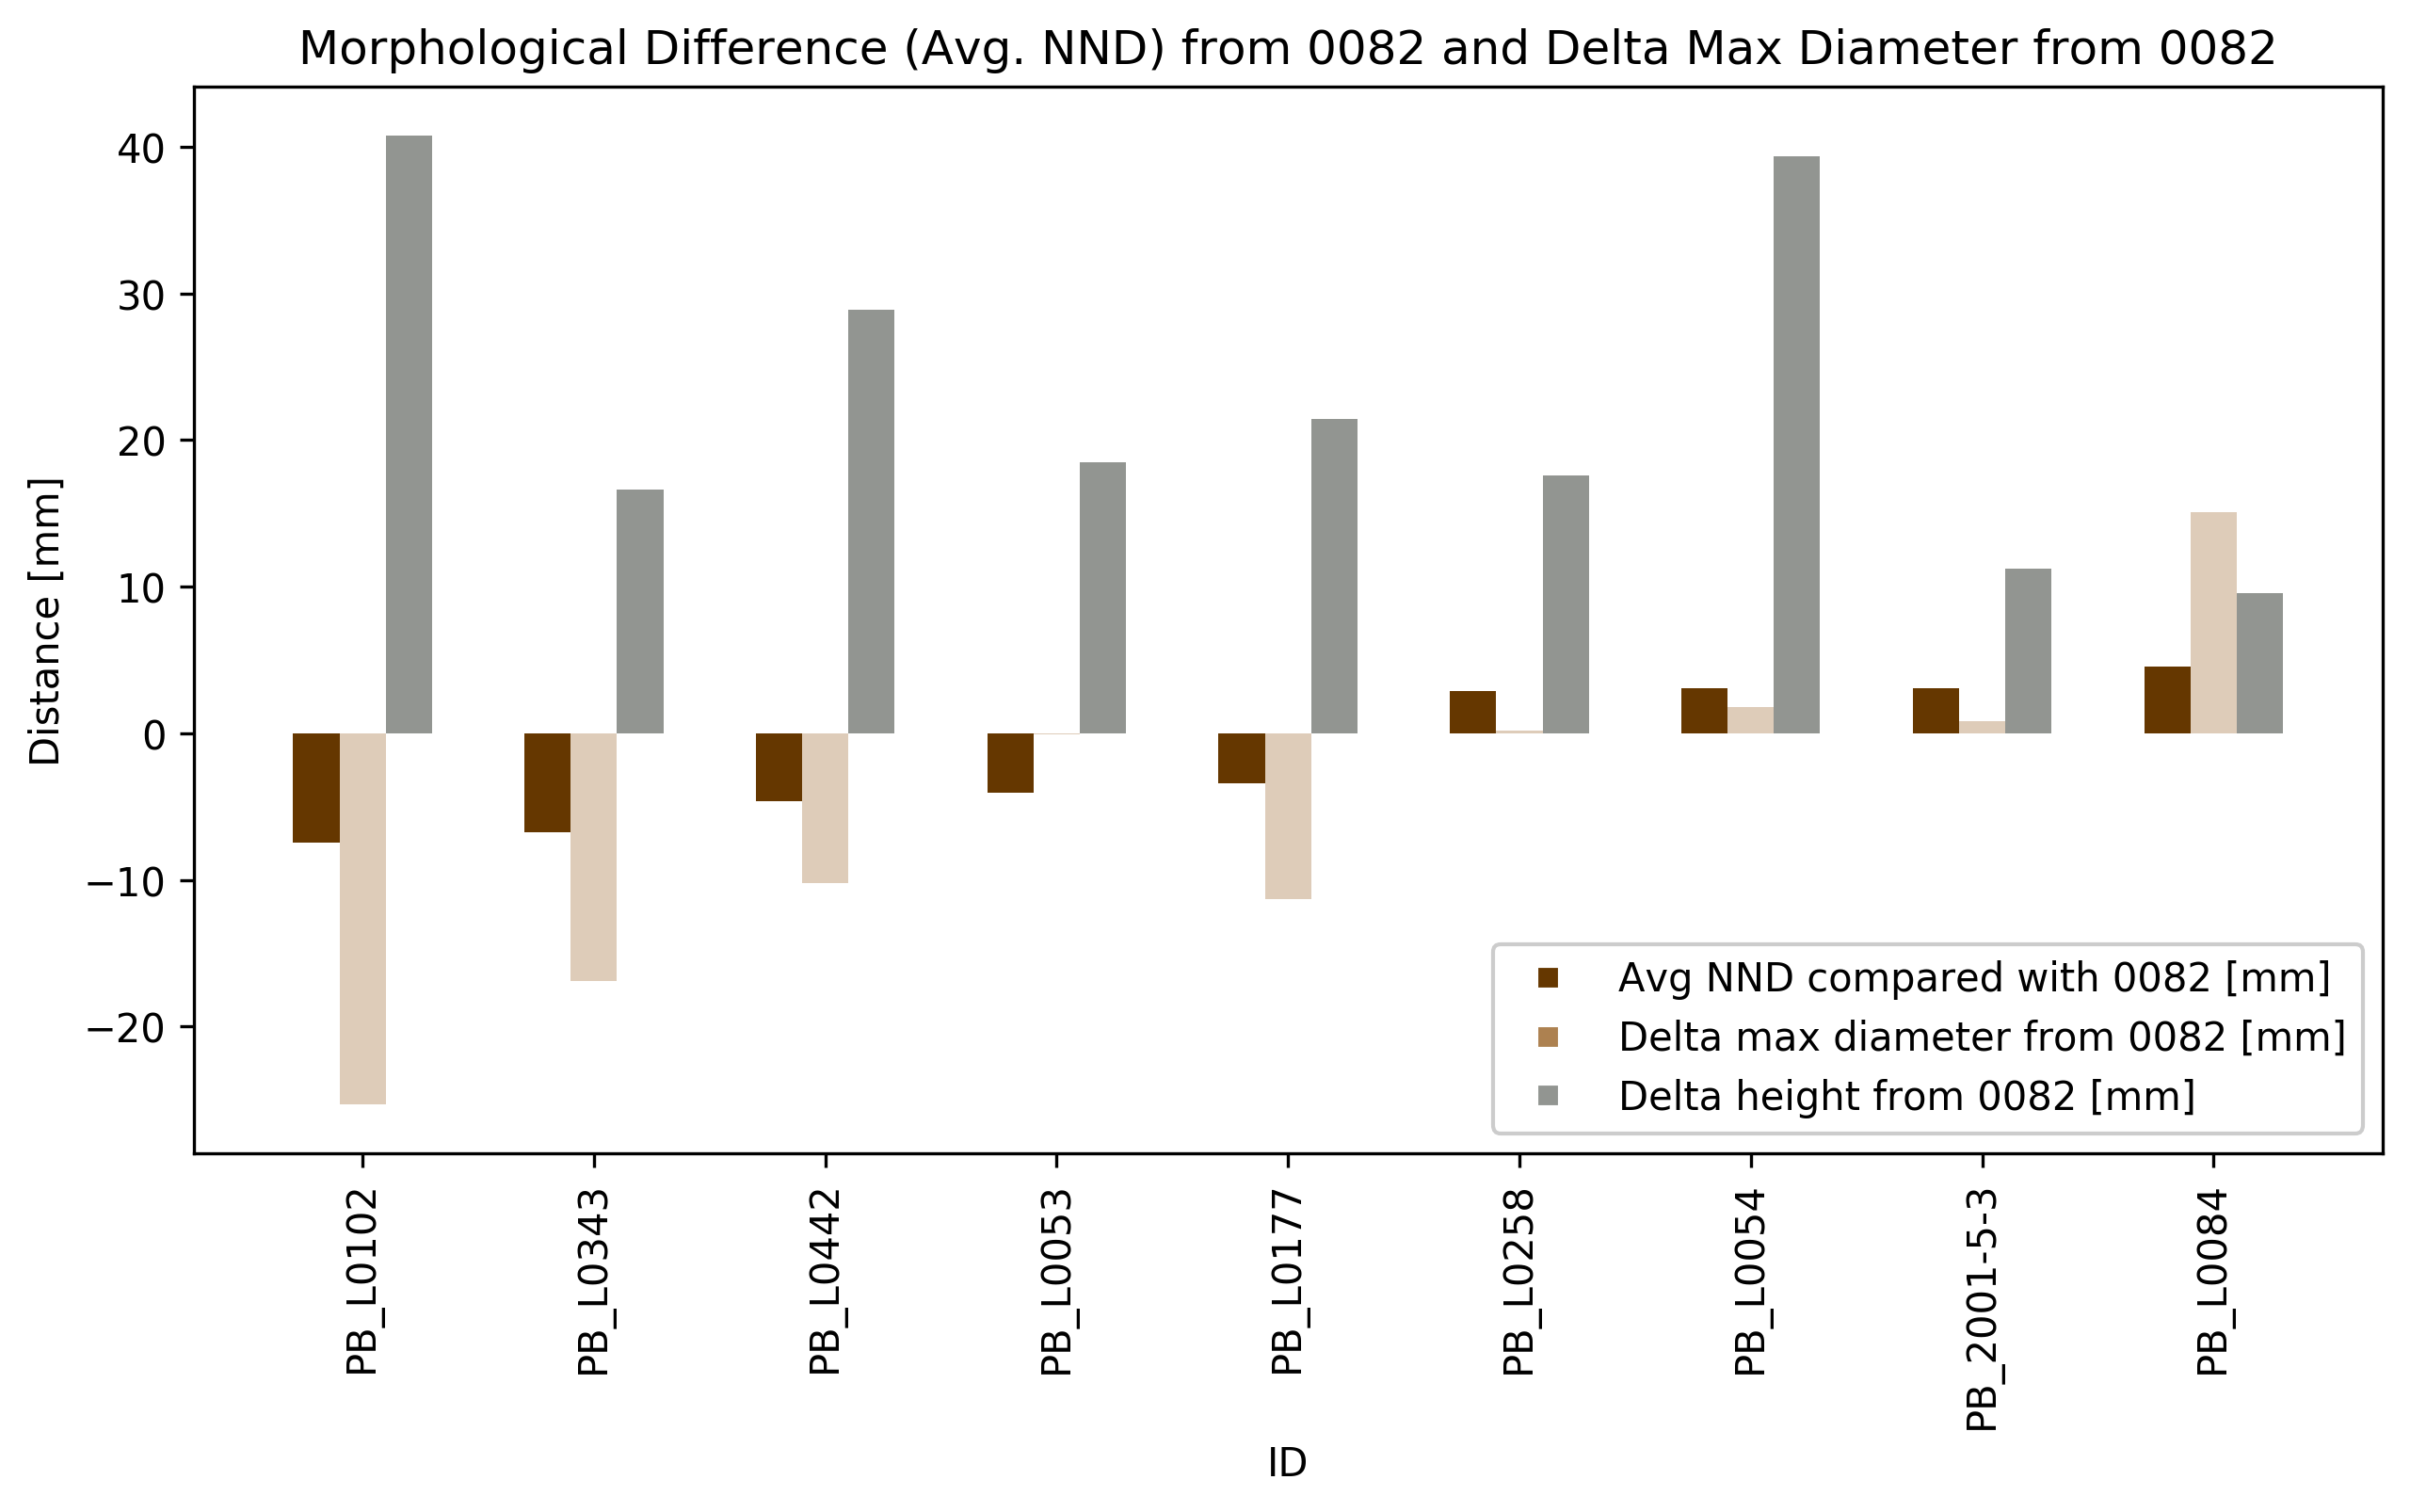

In [16]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
x_pos = np.arange(len(df_use))

w = 0.2
s = 0.2
fs_tick = 20
nnd_color = 'xkcd:brown'
diam_color = 'xkcd:light brown'
height_color = 'xkcd:gray'

ax.bar(x_pos-s, df_use['avg_dist_to_0082_signed'], width=w,color=nnd_color,align='center')
ax.bar(x_pos, df_use['max_diam_delta_from_0082'], width=w,color=diam_color,alpha=0.4,align='center')
ax.bar(x_pos+s, df_use['height_delta_from_0082'], width=w,color=height_color,alpha=1,align='center')

handle_list = [Line2D([0],[0], marker='s', color='w', markerfacecolor=nnd_color, label='Avg NND compared with 0082 [mm]'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=diam_color, label='Delta max diameter from 0082 [mm]'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=height_color, label='Delta height from 0082 [mm]')]

plt.legend(handles=handle_list, loc='lower right', framealpha=1)
plt.xlabel('ID')
plt.ylabel('Distance [mm]')

ax.set_xticks(x_pos)
ax.set_xticklabels([x[:-8] for x in df_use['name']])
ax.set_title('Morphological Difference (Avg. NND) from 0082 and Delta Max Diameter from 0082')
plt.xticks(rotation='vertical')
plt.show()

### Observations

Morphological difference (avg. NND) from 0082 tends to correspond with delta max diameter from 0082, although not perfectly.

## Add lines for distance between smallest and largest jar to plot.

In [9]:
average_distance_largest_to_smallest = 11.483865734515964
max_diam_delta_largest_to_smallest = 40.4

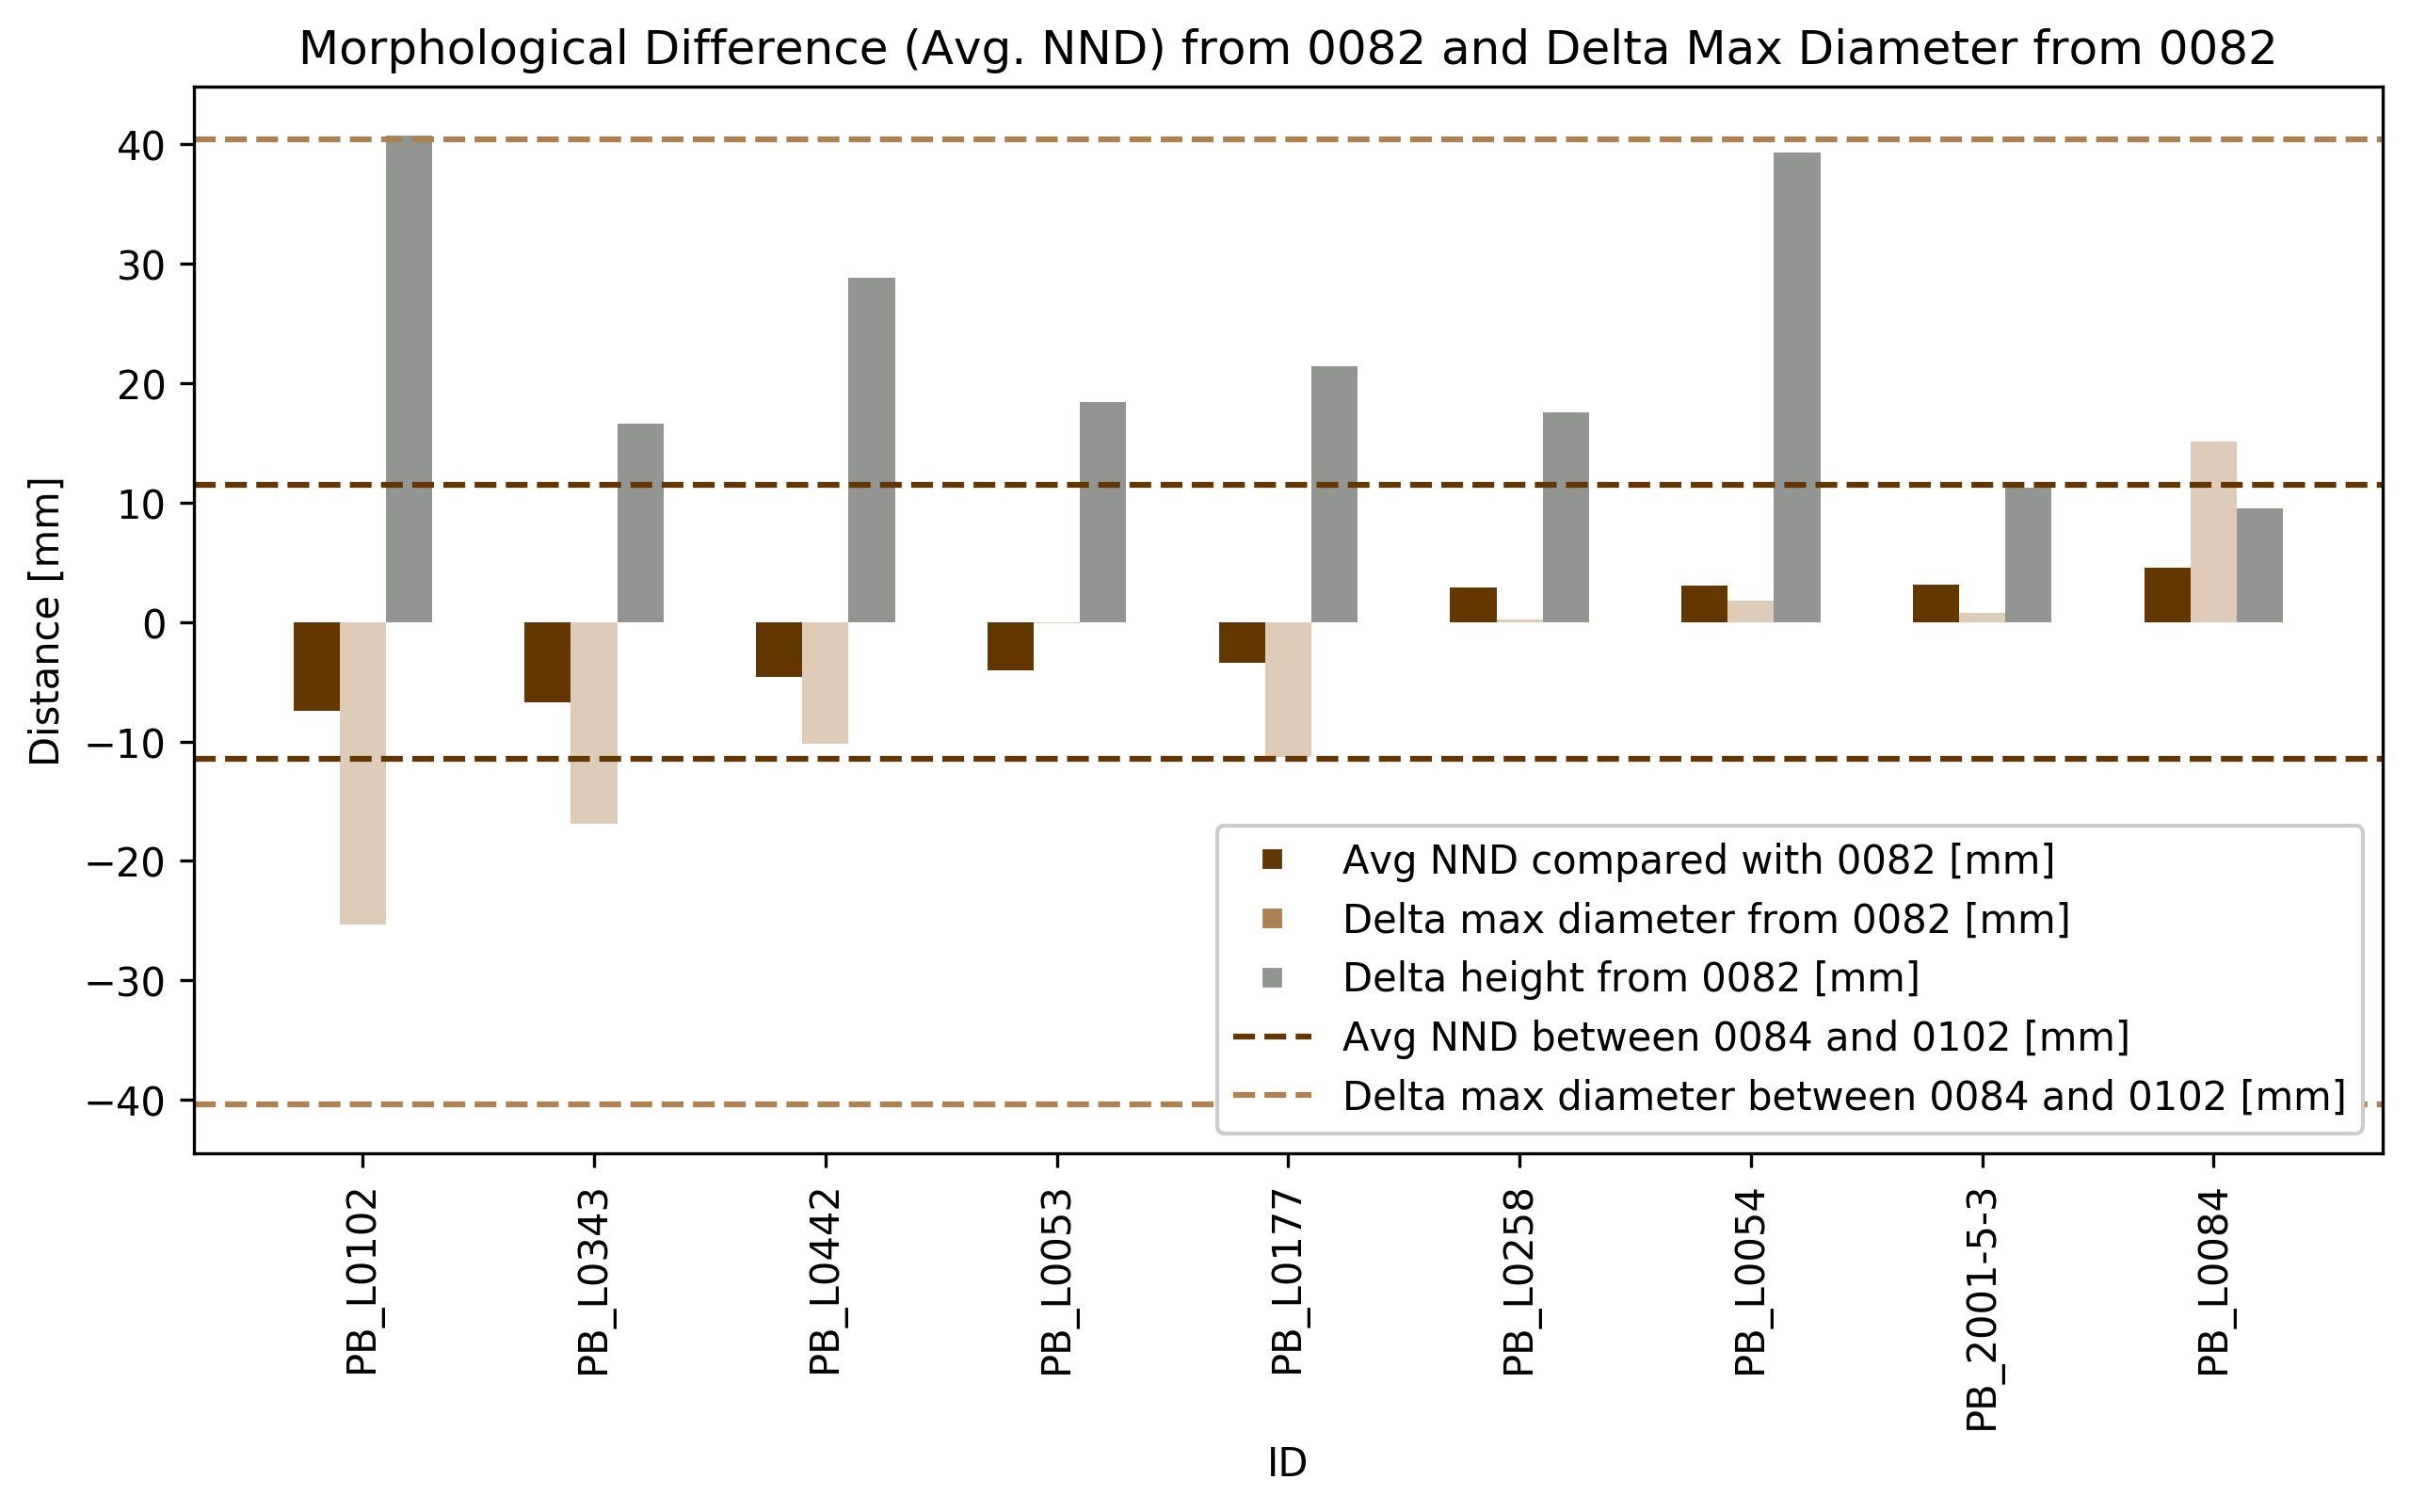

In [18]:
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
x_pos = np.arange(len(df_use))

ax.bar(x_pos-s, df_use['avg_dist_to_0082_signed'], width=w,color=nnd_color,align='center')
ax.bar(x_pos, df_use['max_diam_delta_from_0082'], width=w,color=diam_color,alpha=0.4,align='center')
ax.bar(x_pos+s, df_use['height_delta_from_0082'], width=w,color=height_color,alpha=1,align='center')

handle_list = [Line2D([0],[0], marker='s', color='w', markerfacecolor=nnd_color, label='Avg NND compared with 0082 [mm]'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=diam_color, label='Delta max diameter from 0082 [mm]'),
               Line2D([0],[0], marker='s', color='w', markerfacecolor=height_color, label='Delta height from 0082 [mm]'),
               Line2D([0],[0], marker='None', color=nnd_color, ls='--', label='Avg NND between 0084 and 0102 [mm]'),
               Line2D([0],[0], marker='None', color=diam_color, ls='--', label='Delta max diameter between 0084 and 0102 [mm]')]

plt.legend(handles=handle_list, loc='lower right', framealpha=1)
plt.xlabel('ID')
plt.ylabel('Distance [mm]')

ax.axhline(y=average_distance_largest_to_smallest, c=nnd_color, ls='--')
ax.axhline(y=max_diam_delta_largest_to_smallest, c=diam_color, ls='--')
ax.axhline(y=-1*average_distance_largest_to_smallest, c=nnd_color, ls='--')
ax.axhline(y=-1*max_diam_delta_largest_to_smallest, c=diam_color, ls='--')

ax.set_xticks(x_pos)
ax.set_xticklabels([x[:-8] for x in df_use['name']])
ax.set_title('Morphological Difference (Avg. NND) from 0082 and Delta Max Diameter from 0082')
plt.xticks(rotation='vertical')
plt.show()

### Observations

Sanity check passes: All avg NNDs compared with 0082 are less than the avg NND between 0084 (largest jar) and 0102 (smallest jar), and all delta max diameters from 0082 are less than the delta max diameter between 0084 and 0102.